In [2]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np
import ast, seaborn as sns
from adjustText import adjust_text
from datetime import datetime as dt
from matplotlib.ticker import FuncFormatter
from datasets import load_dataset


#setup
dataset = load_dataset('lukebarousse/data_jobs')
csv = dataset['train'].to_pandas()
csv["job_posted_date"] = pd.to_datetime(csv["job_posted_date"])
csv['job_skills'] = csv['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
csv_us = csv[(csv['job_title_short'] == 'Data Analyst') & (csv['job_country'] == 'United States')].copy()

In [4]:
csv_us = csv_us.dropna(subset=['salary_year_avg'])
csv_exploded = csv_us.explode('job_skills') 

In [5]:
csv_skills = csv_exploded.groupby('job_skills').agg(
    median_salary=('salary_year_avg', 'median'),
    skill_count=('job_skills', 'count')
).sort_values(by='skill_count', ascending=False).head(12)

In [6]:
job_count = len(csv_us)
csv_skills['skill_percent'] = csv_skills['skill_count'] / job_count * 100
csv_skills

,median_salary,skill_count,skill_percent
job_skills,,,
sql,91000.00,2508,57.655172
excel,84392.00,1808,41.563218
python,97500.00,1431,32.896552
tableau,92875.00,1364,31.356322
sas,90000.00,926,21.287356
r,92500.00,893,20.528736
power bi,90000.00,838,19.264368
powerpoint,85000.00,462,10.620690
word,81194.75,461,10.597701


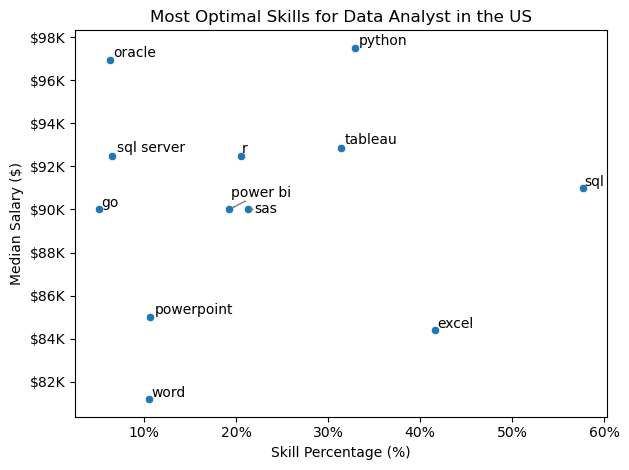

In [7]:
ax = sns.scatterplot(
    data=csv_skills,
    x='skill_percent',
    y='median_salary',
)
text_list = []
for i, r in csv_skills.iterrows():
    text_list.append(plt.text(
        r['skill_percent'],
        r['median_salary'],
        i
    ))
adjust_text(text_list, arrowprops=dict(arrowstyle="->", color='gray'))
plt.title('Most Optimal Skills for Data Analyst in the US')
plt.xlabel('Skill Percentage (%)')
plt.ylabel('Median Salary ($)')
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}%'))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.tight_layout()

In [8]:
csv_tech = csv_us['job_type_skills'].copy()
csv_tech = csv_tech.drop_duplicates()
csv_tech = csv_tech.dropna()

In [9]:
tech_dict = {}
for tech in csv_tech:
    row_dict = ast.literal_eval(tech)
    for key, value in row_dict.items():
        if key in tech_dict:
            tech_dict[key] += value
        else:
            tech_dict[key] = value

for key, value in tech_dict.items():
    tech_dict[key] = list(set(value))

In [10]:
csv_tech = pd.DataFrame(list(tech_dict.items()), columns=['technology', 'skills'])
csv_tech = csv_tech.explode('skills')

csv_plot = csv_skills.merge(csv_tech, left_on='job_skills', right_on='skills') 

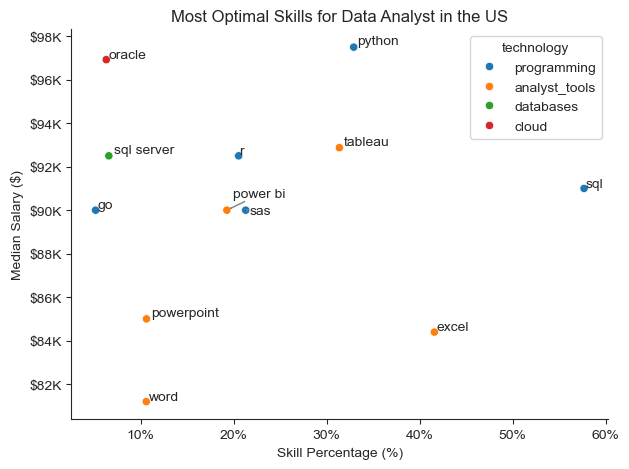

In [ ]:
ax = sns.scatterplot(
    data=csv_plot,
    x='skill_percent',
    y='median_salary',
    hue='technology',
)
text_list = []
for i, r in csv_skills.iterrows():
    text_list.append(plt.text(
        r['skill_percent'],
        r['median_salary'],
        i
    ))
adjust_text(text_list, arrowprops=dict(arrowstyle="->", color='gray'))
plt.title('Most Optimal Skills for Data Analyst in the US')
plt.xlabel('Skill Percentage (%)')
plt.ylabel('Median Salary ($)')
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}%'))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
sns.despine()
plt.tight_layout()
plt.show()